In [3]:
# Hands on ML Chapter 7 (Ensemble Learning and Random Forests)

# Number of coin tosses
import numpy as np

heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1,10001).reshape(-1,1)

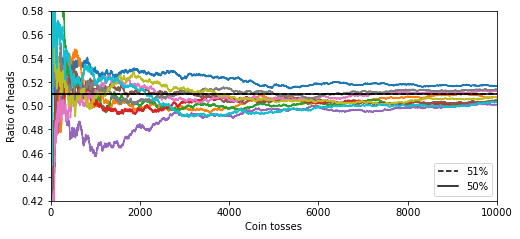

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000], [0.51,0.51], 'k--', label="51%")
plt.plot([0,10000], [0.51,0.51], 'k-', label="50%")
plt.xlabel("Coin tosses")
plt.ylabel("Ratio of heads")
plt.legend(loc="lower right")
plt.axis([0,10000,0.42,0.58])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Creating a voting classifier from its constituent parts

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting="hard")
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [11]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.904
SVC 0.896
VotingClassifier 0.904


In [17]:
# A way to get a diverse set of classifiers is to use very different training algorithms
# This can be achieved by training each model on a random subset of the training set
# Sampling with replacement is called bagging (bootstrap aggregating)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.928


In [19]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

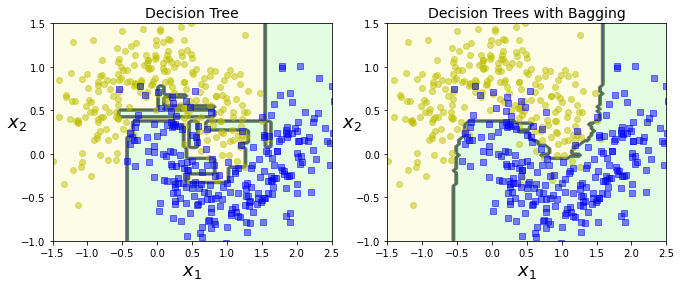

In [20]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

In [21]:
# Out of bag evaluation

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [22]:
# We can now compare the out of bag evaluation to the score on the actual test set

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

In [23]:
# Then we can also see the decision function for each training instance

bag_clf.oob_decision_function_

array([[0.39893617, 0.60106383],
       [0.37566138, 0.62433862],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.00478469, 0.99521531],
       [0.09714286, 0.90285714],
       [0.34911243, 0.65088757],
       [0.02      , 0.98      ],
       [0.98850575, 0.01149425],
       [0.97826087, 0.02173913],
       [0.81764706, 0.18235294],
       [0.01117318, 0.98882682],
       [0.81976744, 0.18023256],
       [0.87046632, 0.12953368],
       [0.95675676, 0.04324324],
       [0.04945055, 0.95054945],
       [0.        , 1.        ],
       [0.98369565, 0.01630435],
       [0.97159091, 0.02840909],
       [0.99481865, 0.00518135],
       [0.01639344, 0.98360656],
       [0.33510638, 0.66489362],
       [0.90860215, 0.09139785],
       [1.        , 0.        ],
       [0.97109827, 0.02890173],
       [0.        , 1.        ],
       [0.995     , 0.005     ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64285714, 0.35714286],
       [0.